In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Data

In [2]:
# data = pd.read_csv("../data/london_bikes.csv")
# data.rename(columns={"t1": "real_temp", "t2": "feel_temp"}, inplace=True)
# data.head()

data = sns.load_dataset("mpg").dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Dimensionality

In [76]:
data.drop(["mpg", "origin", "name"], axis=1).head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


### 2D

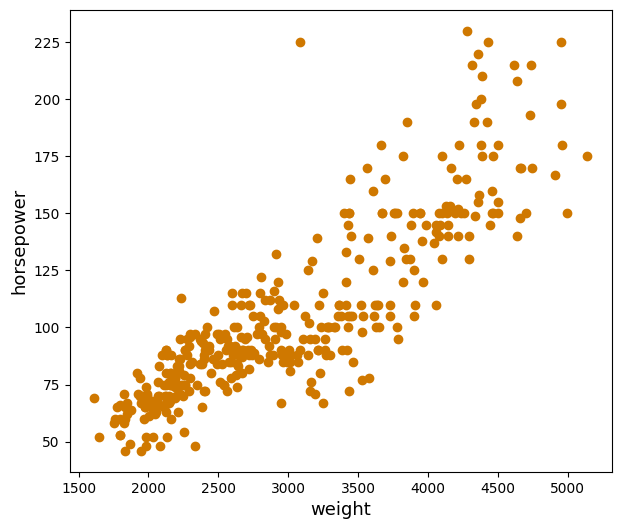

In [189]:
plt.figure(figsize=(7, 6))
plt.scatter(data["weight"], data["horsepower"], color="#cf7800")
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)
plt.savefig("./imgs/dimensions_reduction_2D.png", dpi=200)
plt.show()

### 3D

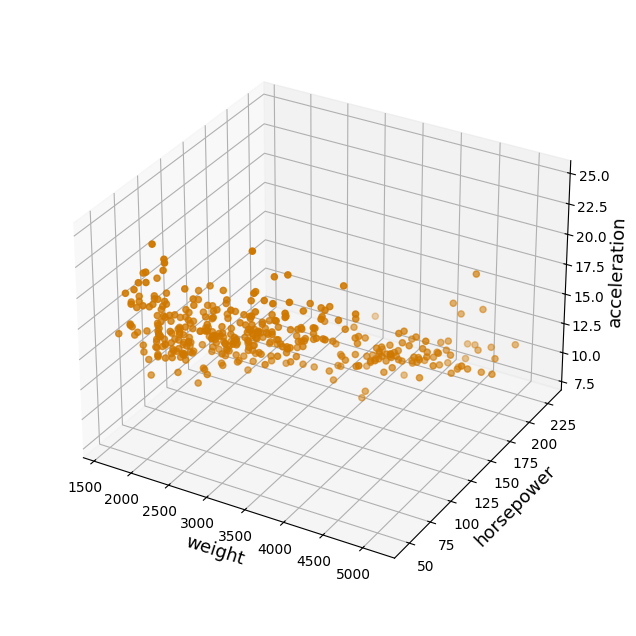

In [188]:
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(
    data["weight"],
    data["horsepower"],
    data["acceleration"],
    color="#cf7800"
)
ax.set_xlabel('weight', fontsize=13)
ax.set_ylabel('horsepower', fontsize=13)
ax.set_zlabel('acceleration', fontsize=13)
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.savefig("./imgs/dimensions_reduction_3D.png", dpi=200)
plt.show()

### 4D

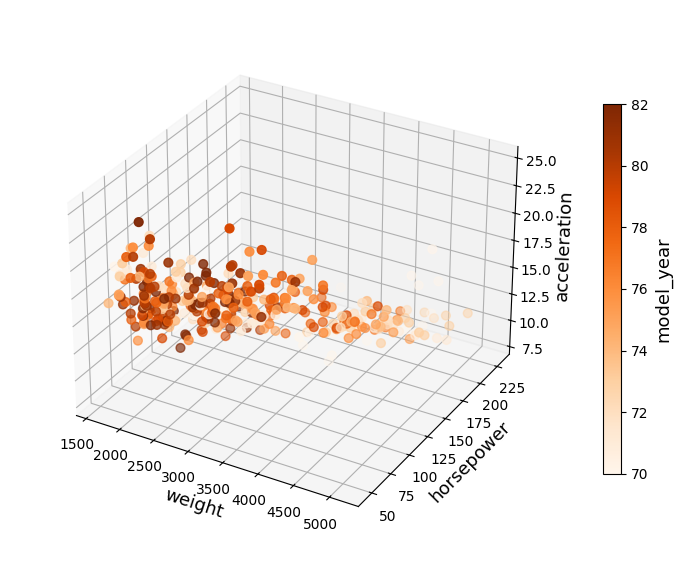

In [187]:
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(
    data["weight"],
    data["horsepower"],
    data["acceleration"],
    c=data['model_year'],
    cmap="Oranges",
    marker="o",
    s=40
)
ax.set_xlabel('weight', fontsize=13)
ax.set_ylabel('horsepower', fontsize=13)
ax.set_zlabel('acceleration', fontsize=13)
ax.set_box_aspect(aspect=None, zoom=0.9)

colorbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
colorbar.set_label("model_year", fontsize=13)

plt.savefig("./imgs/dimensions_reduction_4D.png", dpi=200)
plt.show()

# PCA

### Explanation

### Step 1

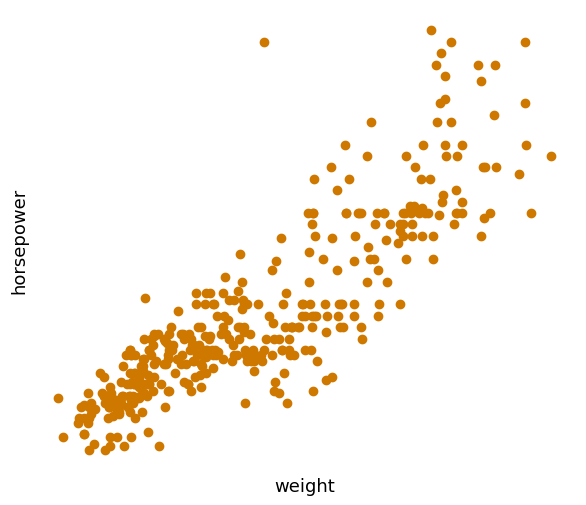

In [186]:
fig, ax = plt.subplots(figsize=(7, 6))
plt.scatter(data["weight"], data["horsepower"], color="#cf7800")
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_1.png", dpi=200)
plt.show()

### Step 2

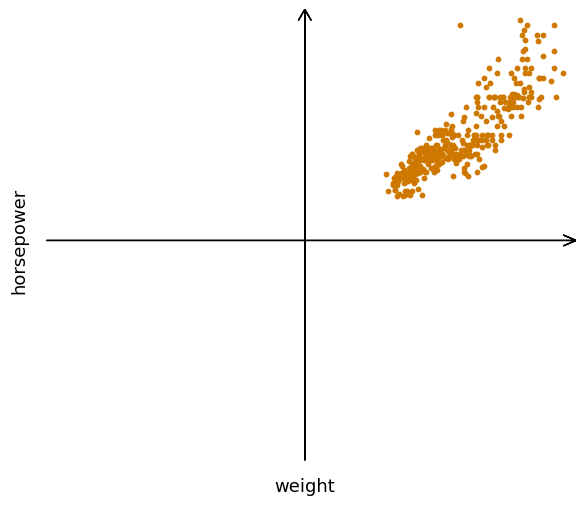

In [185]:
fig, ax = plt.subplots(figsize=(7, 6))
plt.scatter(data["weight"], data["horsepower"], color="#cf7800", s=10)
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)

weight_max = data["weight"].max()
horsepower_max = data["horsepower"].max()

plt.xlim(-weight_max*1.05, weight_max*1.05)
plt.ylim(-horsepower_max*1.05, horsepower_max*1.05)

plt.arrow(-weight_max, 0, 2*weight_max, 0, overhang=1.0,
          head_width=horsepower_max*0.05, head_length=weight_max*0.05)
plt.arrow(0, -horsepower_max, 0, 2*horsepower_max, overhang=1.0,
          head_width=weight_max*0.05, head_length=horsepower_max*0.05)

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_2.png", dpi=200)
plt.show()

### Step 3

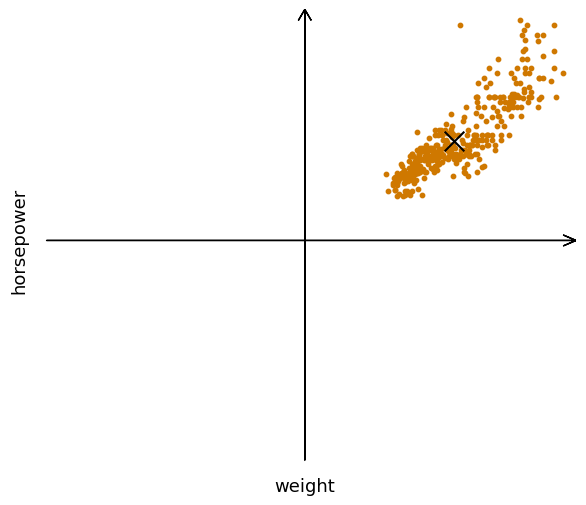

In [184]:
fig, ax = plt.subplots(figsize=(7, 6))

weight_max = data["weight"].max()
weight_avg = data["weight"].mean()
horsepower_max = data["horsepower"].max()
horsepower_avg = data["horsepower"].mean()

plt.scatter(data["weight"], data["horsepower"], color="#cf7800", s=10)
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)

plt.xlim(-weight_max*1.05, weight_max*1.05)
plt.ylim(-horsepower_max*1.05, horsepower_max*1.05)

plt.arrow(-weight_max, 0, 2*weight_max, 0, overhang=1.0,
          head_width=horsepower_max*0.05, head_length=weight_max*0.05)
plt.arrow(0, -horsepower_max, 0, 2*horsepower_max, overhang=1.0,
          head_width=weight_max*0.05, head_length=horsepower_max*0.05)

plt.scatter([weight_avg], [horsepower_avg], color="black", marker="x", s=200)

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_3.png", dpi=200)
plt.show()

### Step 4

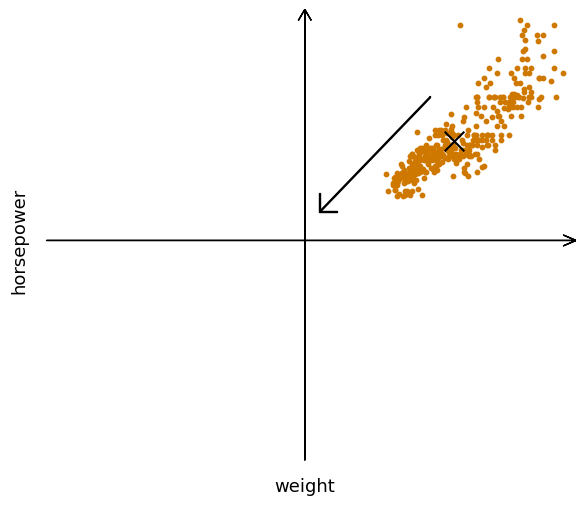

In [183]:
fig, ax = plt.subplots(figsize=(7, 6))

weight_max = data["weight"].max()
weight_avg = data["weight"].mean()
horsepower_max = data["horsepower"].max()
horsepower_avg = data["horsepower"].mean()

plt.scatter(data["weight"], data["horsepower"], color="#cf7800", s=10)
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)

plt.xlim(-weight_max*1.05, weight_max*1.05)
plt.ylim(-horsepower_max*1.05, horsepower_max*1.05)

plt.arrow(-weight_max, 0, 2*weight_max, 0, overhang=1.0,
          head_width=horsepower_max*0.05, head_length=weight_max*0.05)
plt.arrow(0, -horsepower_max, 0, 2*horsepower_max, overhang=1.0,
          head_width=weight_max*0.05, head_length=horsepower_max*0.05)

plt.scatter([weight_avg], [horsepower_avg], color="black", marker="x", s=200)

plt.arrow(2500, 150, -2200, -120, overhang=1.0, width=1.5, head_width=0, head_length=0)
plt.arrow(300, 30, 0, 20, width=20, head_width=0, head_length=0)
plt.arrow(300, 30, 350, 0, width=1.2, head_width=0, head_length=0)

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_4.png", dpi=200)
plt.show()

### Step 5

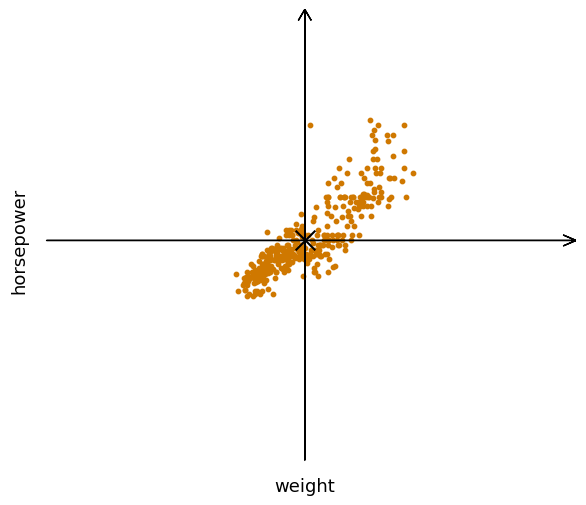

In [190]:
fig, ax = plt.subplots(figsize=(7, 6))

weight_max = data["weight"].max()
weight_avg = data["weight"].mean()
horsepower_max = data["horsepower"].max()
horsepower_avg = data["horsepower"].mean()

plt.scatter(data["weight"]-weight_avg, data["horsepower"]-horsepower_avg, color="#cf7800", s=10)
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)

plt.xlim(-weight_max*1.05, weight_max*1.05)
plt.ylim(-horsepower_max*1.05, horsepower_max*1.05)

plt.arrow(-weight_max, 0, 2*weight_max, 0, overhang=1.0,
          head_width=horsepower_max*0.05, head_length=weight_max*0.05)
plt.arrow(0, -horsepower_max, 0, 2*horsepower_max, overhang=1.0,
          head_width=weight_max*0.05, head_length=horsepower_max*0.05)

plt.scatter(0, 0, color="black", marker="x", s=200)

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_5.png", dpi=200)
plt.show()

### Step 6

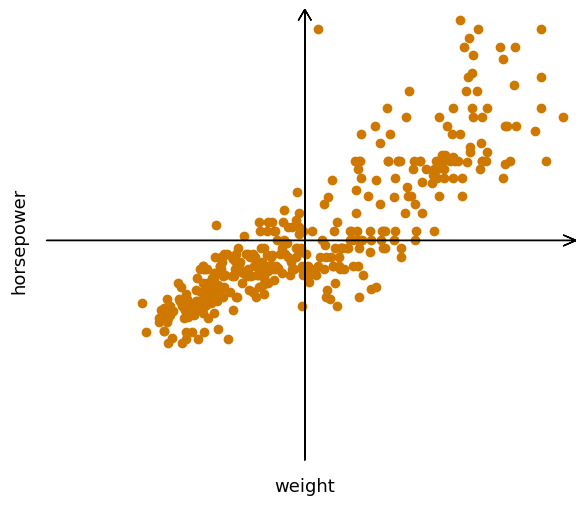

In [191]:
fig, ax = plt.subplots(figsize=(7, 6))

weight_avg = data["weight"].mean()
horsepower_avg = data["horsepower"].mean()

plt.scatter(data["weight"]-weight_avg, data["horsepower"]-horsepower_avg, color="#cf7800")
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)

weight_max = max((data["weight"]-weight_avg).max(), -(data["weight"]-weight_avg).min())
horsepower_max = max((data["horsepower"]-horsepower_avg).max(), -(data["horsepower"]-horsepower_avg).min())

plt.xlim(-weight_max*1.05, weight_max*1.05)
plt.ylim(-horsepower_max*1.05, horsepower_max*1.05)

plt.arrow(-weight_max, 0, 2*weight_max, 0, overhang=1.0,
          head_width=horsepower_max*0.05, head_length=weight_max*0.05)
plt.arrow(0, -horsepower_max, 0, 2*horsepower_max, overhang=1.0,
          head_width=weight_max*0.05, head_length=horsepower_max*0.05)

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_6.png", dpi=200)
plt.show()

### Step 7

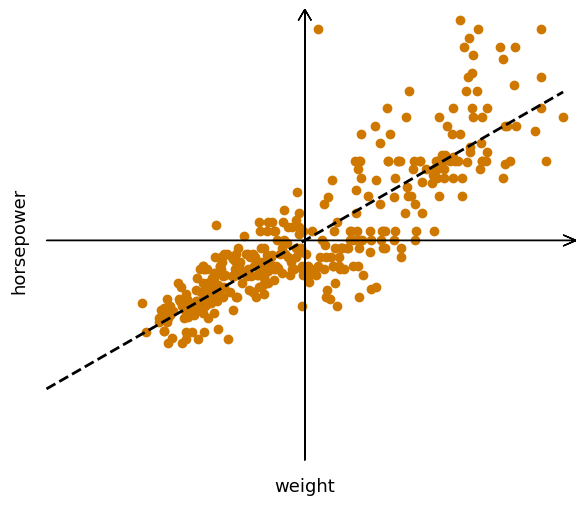

In [192]:
fig, ax = plt.subplots(figsize=(7, 6))

weight_avg = data["weight"].mean()
horsepower_avg = data["horsepower"].mean()

X = data["weight"]-weight_avg
y = data["horsepower"]-horsepower_avg

plt.scatter(X, y, color="#cf7800")
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)

weight_max = max((X).max(), -(X).min())
horsepower_max = max((y).max(), -(y).min())

plt.xlim(-weight_max*1.05, weight_max*1.05)
plt.ylim(-horsepower_max*1.05, horsepower_max*1.05)

plt.arrow(-weight_max, 0, 2*weight_max, 0, overhang=1.0,
          head_width=horsepower_max*0.05, head_length=weight_max*0.05)
plt.arrow(0, -horsepower_max, 0, 2*horsepower_max, overhang=1.0,
          head_width=weight_max*0.05, head_length=horsepower_max*0.05)

model = LinearRegression().fit(X.to_numpy().reshape((-1, 1)), y.to_numpy())
X_pred = np.linspace(-weight_max, weight_max, 100).reshape((-1, 1))
y_pred = model.predict(X_pred)
plt.plot(X_pred, y_pred, linestyle="dashed", color="k", linewidth=2)

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_7.png", dpi=200)
plt.show()

### Step 8

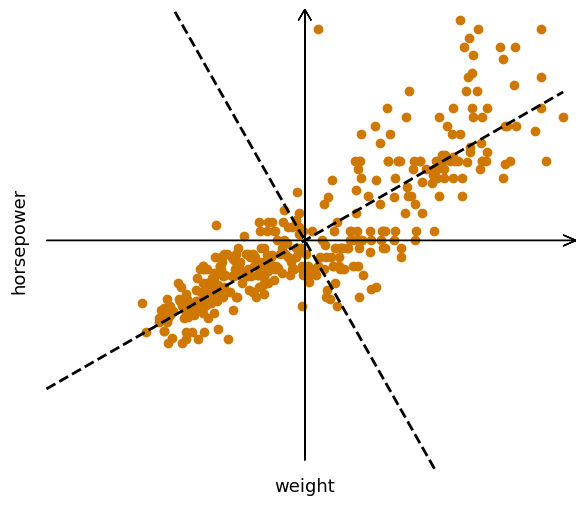

In [193]:
fig, ax = plt.subplots(figsize=(7, 6))

weight_avg = data["weight"].mean()
horsepower_avg = data["horsepower"].mean()

X = data["weight"]-weight_avg
y = data["horsepower"]-horsepower_avg

plt.scatter(X, y, color="#cf7800")
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)

weight_max = max((X).max(), -(X).min())
horsepower_max = max((y).max(), -(y).min())

plt.xlim(-weight_max*1.05, weight_max*1.05)
plt.ylim(-horsepower_max*1.05, horsepower_max*1.05)

plt.arrow(-weight_max, 0, 2*weight_max, 0, overhang=1.0,
          head_width=horsepower_max*0.05, head_length=weight_max*0.05)
plt.arrow(0, -horsepower_max, 0, 2*horsepower_max, overhang=1.0,
          head_width=weight_max*0.05, head_length=horsepower_max*0.05)

model = LinearRegression().fit(X.to_numpy().reshape((-1, 1)), y.to_numpy())
X_pred = np.linspace(-weight_max, weight_max, 100).reshape((-1, 1))
y_pred = model.predict(X_pred)
plt.plot(X_pred, y_pred, linestyle="dashed", color="k", linewidth=2)

y_pred_2 = X_pred * (-0.12)
plt.plot(X_pred, y_pred_2, linestyle="dashed", color="k", linewidth=2)

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_8.png", dpi=200)
plt.show()

### Step 9

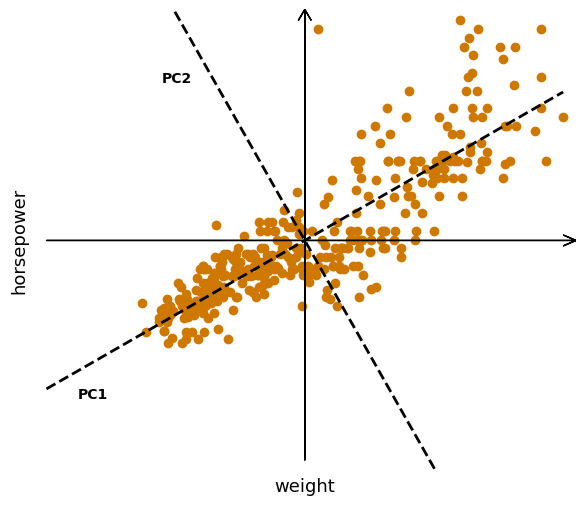

In [194]:
fig, ax = plt.subplots(figsize=(7, 6))

weight_avg = data["weight"].mean()
horsepower_avg = data["horsepower"].mean()

X = data["weight"]-weight_avg
y = data["horsepower"]-horsepower_avg

plt.scatter(X, y, color="#cf7800")
plt.xlabel("weight", fontsize=13)
plt.ylabel("horsepower", fontsize=13)

weight_max = max((X).max(), -(X).min())
horsepower_max = max((y).max(), -(y).min())

plt.xlim(-weight_max*1.05, weight_max*1.05)
plt.ylim(-horsepower_max*1.05, horsepower_max*1.05)

plt.arrow(-weight_max, 0, 2*weight_max, 0, overhang=1.0,
          head_width=horsepower_max*0.05, head_length=weight_max*0.05)
plt.arrow(0, -horsepower_max, 0, 2*horsepower_max, overhang=1.0,
          head_width=weight_max*0.05, head_length=horsepower_max*0.05)

model = LinearRegression().fit(X.to_numpy().reshape((-1, 1)), y.to_numpy())
X_pred = np.linspace(-weight_max, weight_max, 100).reshape((-1, 1))
y_pred = model.predict(X_pred)
plt.plot(X_pred, y_pred, linestyle="dashed", color="k", linewidth=2)

y_pred_2 = X_pred * (-0.12)
plt.plot(X_pred, y_pred_2, linestyle="dashed", color="k", linewidth=2)

plt.text(-1900, -90, "PC1", fontdict={"weight": "bold"})
plt.text(-1200, 90, "PC2", fontdict={"weight": "bold"})

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_9.png", dpi=200)
plt.show()

### Step 10

Rotation

### Step 11

In [116]:
def rotate(origin, point, angle):
    ox, oy = origin
    px, py = point
    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qx, qy

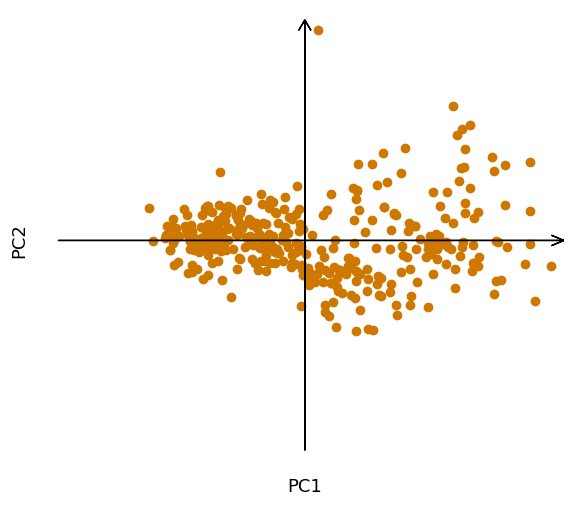

In [201]:
fig, ax = plt.subplots(figsize=(7, 6))

weight_avg = data["weight"].mean()
horsepower_avg = data["horsepower"].mean()

X = (data["weight"]-weight_avg).to_numpy()
y = (data["horsepower"]-horsepower_avg).to_numpy()

points = np.array([X, y]).T

model = LinearRegression().fit(X.reshape((-1, 1)), y)
angle = np.arctan(model.coef_[0])

for i in range(len(points)):
    qx, qy = rotate([0, 0], points[i], -angle)
    points[i][0] = qx
    points[i][1] = qy

X, y = points.T

plt.scatter(X, y, color="#cf7800")
plt.xlabel("PC1", fontsize=13)
plt.ylabel("PC2", fontsize=13)

weight_max = max(X.max(), -X.min())
horsepower_max = max(y.max(), -y.min())

plt.xlim(-weight_max*1.1, weight_max*1.1)
plt.ylim(-horsepower_max*1.1, horsepower_max*1.1)

plt.arrow(-weight_max, 0, 2*weight_max, 0, overhang=1.0,
          head_width=horsepower_max*0.05, head_length=weight_max*0.05)
plt.arrow(0, -horsepower_max, 0, 2*horsepower_max, overhang=1.0,
          head_width=weight_max*0.05, head_length=horsepower_max*0.05)

plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/pca_explanation_11.png", dpi=200)
plt.show()

### Done

In [199]:
X = data.drop(["mpg", "origin", "name"], axis=1)
y = data[["mpg"]].to_numpy().squeeze()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

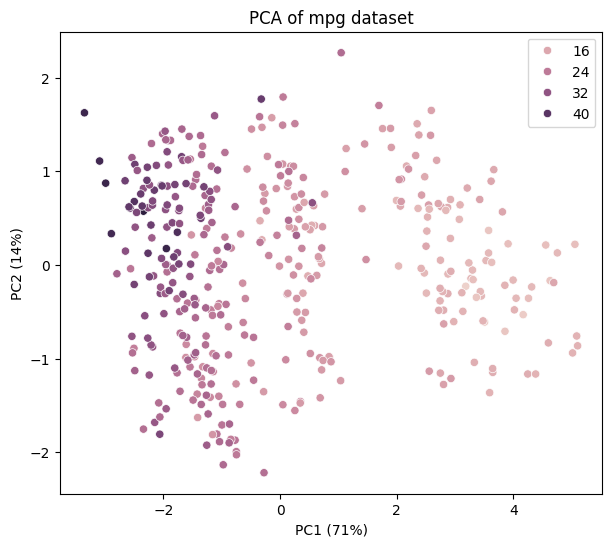

In [200]:
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x = X_pca[:, 0],
    y = X_pca[:, 1],
    hue = y
)
plt.title("PCA of mpg dataset")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.0f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.0f}%)")

plt.savefig("./imgs/PCA_mpg.png", dpi=200)
plt.show()